<h1> Checkpoint:</h1>

**Looking to see completetion and effort in completing the checkpoint. It's okay if it's not correct**

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import numpy, pandas, matplotlib, and seaborn

(Feel free to import other libraries!)

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn as sb
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [2]:
df = pd.read_csv('../data/states_edu.csv')

You should always familiarize yourself with what each column in the dataframe represents. \ Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [3]:
df.head()
df.dropna()

PRIMARY_KEY          STATE  YEAR     ENROLL  TOTAL_REVENUE  \
561         2003_ALABAMA        ALABAMA  2003   727900.0      5196054.0   
562          2003_ALASKA         ALASKA  2003   133303.0      1425948.0   
563         2003_ARIZONA        ARIZONA  2003   875111.0      6529894.0   
564        2003_ARKANSAS       ARKANSAS  2003   450158.0      3241275.0   
565      2003_CALIFORNIA     CALIFORNIA  2003  6226552.0     59815855.0   
...                  ...            ...   ...        ...            ...   
1219       2015_VIRGINIA       VIRGINIA  2015  1279867.0     15857524.0   
1220     2015_WASHINGTON     WASHINGTON  2015  1072359.0     13709442.0   
1221  2015_WEST_VIRGINIA  WEST_VIRGINIA  2015   279565.0      3478401.0   
1222      2015_WISCONSIN      WISCONSIN  2015   861813.0     11637376.0   
1223        2015_WYOMING        WYOMING  2015    93867.0      1962874.0   

      FEDERAL_REVENUE  STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  \
561          567704.0      2966981.0      1661369.0          5298932.0   
562          259423.0       813371.0       353154.0          1610289.0   
563          740579.0      2912629.0      2876686.0          6210287.0   
564          379947.0      2394336.0       466992.0          3242799.0   
565         5795655.0     33617766.0     20402434.0         59749885.0   
...               ...            ...            ...                ...   
1219        1012205.0      6240349.0      8604970.0         16113212.0   
1220        1036422.0      8293812.0      4379208.0         13630138.0   
1221         362959.0      1979466.0      1135976.0          3466981.0   
1222         814385.0      5869265.0      4953726.0         11553677.0   
1223         120290.0      1116917.0       725667.0          1942406.0   

      INSTRUCTION_EXPENDITURE  ...  GRADES_4_G  GRADES_8_G  GRADES_12_G  \
561                 2817111.0  ...     57323.0     59663.0      42005.0   
562                  763525.0  ...     10115.0     11140.0       8651.0   
563                 2810907.0  ...     76207.0     76376.0      68815.0   
564                 1768713.0  ...     34070.0     37004.0      28840.0   
565                29561563.0  ...    493415.0    500143.0     395194.0   
...                       ...  ...         ...         ...          ...   
1219                8755896.0  ...     96851.0     95221.0      90391.0   
1220                6508964.0  ...     82404.0     79483.0      89258.0   
1221                1819903.0  ...     19814.0     20426.0      18432.0   
1222                5723474.0  ...     60999.0     61084.0      66253.0   
1223                 895910.0  ...      7551.0      6902.0       6299.0   

      GRADES_1_8_G  GRADES_9_12_G  GRADES_ALL_G  AVG_MATH_4_SCORE  \
561       466920.0       205907.0      731220.0             223.0   
562        82337.0        40238.0      133933.0             233.0   
563       613442.0       307272.0     1012068.0             229.0   
564       281834.0       132712.0      454523.0             229.0   
565      3929869.0      1854518.0     6413867.0             227.0   
...            ...            ...           ...               ...   
1219      772414.0       386781.0     1283590.0             247.0   
1220      656797.0       336808.0     1087030.0             245.0   
1221      162070.0        80142.0      277452.0             235.0   
1222      489919.0       263896.0      867800.0             243.0   
1223       59453.0        26914.0       94717.0             247.0   

      AVG_MATH_8_SCORE  AVG_READING_4_SCORE  AVG_READING_8_SCORE  
561              262.0                207.0                253.0  
562              279.0                212.0                256.0  
563              271.0                209.0                255.0  
564              266.0                214.0                258.0  
565              267.0                206.0                251.0  
...                ...                  ...                  ...  
1219             288.0  

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: **<Math for 4 grade>**   (Ex. Math for 8th grade)

**(hit `Enter` to edit)**

Outcome Score in the questions refers to the outcome variable you chose here.

How many different years of data are in our dataset? Use a pandas function.

In [4]:
len(df['YEAR'].unique())

33

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [5]:
Michigan_4_math_avg = df[df['STATE'] == "MICHIGAN"]["AVG_MATH_4_SCORE"].mean()
print("The average 4th grade math score for Michigan is " + str(Michigan_4_math_avg))
Ohio_4_math_avg = df[df['STATE'] == "OHIO"]["AVG_MATH_4_SCORE"].mean()
print("The average 4th grade math score for Ohio is " + str(Ohio_4_math_avg))
print("Ohio has higher average 4th grade math scores.")

The average 4th grade math score for Michigan is 234.36363636363637
The average 4th grade math score for Ohio is 239.45454545454547
Ohio has higher average 4th grade math scores.


Find the average for your outcome score across all states in 2019

In [6]:
average_4th_grade_math_score = df[df["YEAR"]==2019]["AVG_MATH_4_SCORE"].mean()
print("The average 4th grade math score among states is " + str(average_4th_grade_math_score))

The average 4th grade math score among states is 239.9433962264151


Find the maximum outcome score for every state. Hint: there's a function that allows you to do this easily

In [7]:
states = df.groupby("STATE")
states["AVG_MATH_4_SCORE"].max()

STATE
ALABAMA                 233.0
ALASKA                  237.0
ARIZONA                 240.0
ARKANSAS                240.0
CALIFORNIA              235.0
COLORADO                247.0
CONNECTICUT             245.0
DELAWARE                243.0
DISTRICT_OF_COLUMBIA    235.0
DODEA                   250.0
FLORIDA                 246.0
GEORGIA                 240.0
HAWAII                  243.0
IDAHO                   242.0
ILLINOIS                239.0
INDIANA                 249.0
IOWA                    246.0
KANSAS                  248.0
KENTUCKY                242.0
LOUISIANA               234.0
MAINE                   246.0
MARYLAND                247.0
MASSACHUSETTS           253.0
MICHIGAN                238.0
MINNESOTA               253.0
MISSISSIPPI             241.0
MISSOURI                241.0
MONTANA                 244.0
NATIONAL                242.0
NEBRASKA                246.0
NEVADA                  237.0
NEW_HAMPSHIRE           253.0
NEW_JERSEY              249.0
NEW_

<h2> Feature Selection </h2>

After exploring the data, you now have to choose features that you would use to predict the performance of the students on a chosen test (chosen outcome variable). By the way, you can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features

Final feature list: **<Correlation between 4th grade reading and math scores.\>** 
**<Instructional expenditure vs grade 4 math scores.\>**
**<Regression model to predict 4th grade math scores.\>**

Feature selection justification: **<I am going to compare the 4th grade reading scores to the instructional expenditures.\>**

<h2>Visualization</h2>

Use any graph you wish to see the relationship of your chosen outcome variable with any features you chose

**Visualization 1**

Text(0, 0.5, 'Average 4th grade math score')

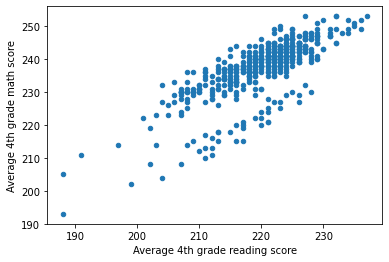

In [8]:
df.plot.scatter(x="AVG_READING_4_SCORE", y="AVG_MATH_4_SCORE")
plt.xlabel("Average 4th grade reading score")
plt.ylabel("Average 4th grade math score")

**<Relationship between 4th grade math and reading scores.>**

**Visualization 2**

Text(0, 0.5, 'Intructional expenditure (incdollars)')

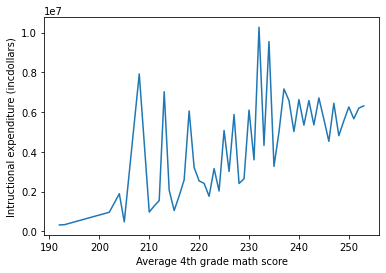

In [9]:
df.groupby('AVG_MATH_4_SCORE').INSTRUCTION_EXPENDITURE.mean().plot()
plt.xlabel("Average 4th grade math score")
plt.ylabel("Intructional expenditure (incdollars)")

**<Plot visualizing how much the instruction expenditure on average is spent for each score.>**
<h3>^ Plot visualizing how mich the instruction expenditure on average is spent for each score.</h3>

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [10]:
from sklearn.model_selection import train_test_split

In [33]:
X = df[['TOTAL_REVENUE','INSTRUCTION_EXPENDITURE','AVG_READING_4_SCORE','LOCAL_REVENUE']].dropna()
y = df.loc[X.index]['AVG_MATH_4_SCORE']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=3, random_state=0)
X_train = X_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
y_train = y_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

<h2> Prediction </h2>

ML Models Resource: https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a

Chosen ML task: **<Regression\>**

In [44]:
# import your sklearn class here
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [45]:
# create your model here
model = LinearRegression()


In [46]:
model.fit(X_train, y_train)

LinearRegression()

In [47]:
y_pred = model.predict(X_test)

Text(0, 0.5, 'AVG_MATH_4_SCORE')

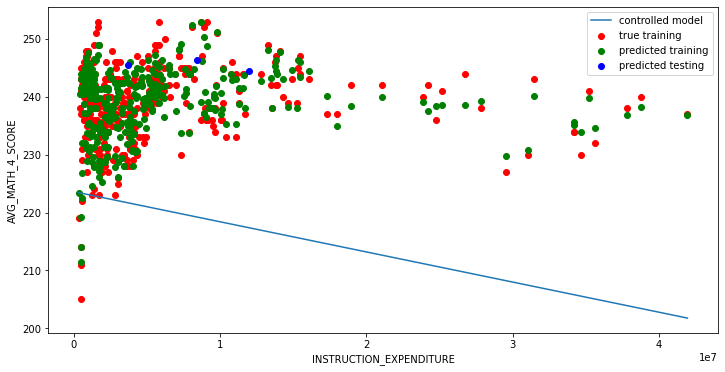

In [48]:
# FOR REGRESSION ONLY: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name ='INSTRUCTION_EXPENDITURE'
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_4_SCORE')

<h2> Summary </h2>

**<I used a linear regression model to predict test scores with increasing instruction expenditure. The predictive model shows that with generally higher instructional expenditures there are high 4th grade math scores. This data uses all years of existing data. The model also takes into account the years, local revenue, and 4th grade reading scores of the student. Together this data created a simple regression model that could be plotted on a chart. There is a plausible trend between the increasing expenditure and scores, however the control model does not strongly match the trend.\>**